In [ ]:
## importing necessary liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# import dataset

In [ ]:
data=pd.read_csv('/content/framingham.csv')

In [ ]:
## copy data to datframe
df=data.copy()
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
## bottom five rows
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [ ]:
## index of dataset
df.index

RangeIndex(start=0, stop=4240, step=1)

In [ ]:
## shape of dataset
print("Total rows are - ",df.shape[0])
print("Total columns are - ",df.shape[1])

Total rows are -  4240
Total columns are -  16


## datatype of dataset features

In [ ]:
df.dtypes

,0
male,int64
age,int64
education,float64
currentSmoker,int64
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,float64


In [ ]:
## information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## unique values in dataset

In [ ]:
df.nunique()

,0
male,2
age,39
education,4
currentSmoker,2
cigsPerDay,33
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2
totChol,248


## null values in dataset

In [ ]:
df.isna().any()

,0
male,False
age,False
education,True
currentSmoker,False
cigsPerDay,True
BPMeds,True
prevalentStroke,False
prevalentHyp,False
diabetes,False
totChol,True


In [ ]:
df.isna().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


## all null values columns are int or float datatype, so i will fill null values with median.
## check median of null values column

In [ ]:
print(df['education'].median())
print(df['cigsPerDay'].median())
print(df['BPMeds'].median())
print(df['totChol'].median())
print(df['BMI'].median())
print(df['glucose'].median())
print(df['heartRate'].median())

2.0
0.0
0.0
234.0
25.4
78.0
75.0


## fill NAN with its median values

In [ ]:
df['education'].fillna(2,inplace=True)
df['cigsPerDay'].fillna(0,inplace=True)
df['BPMeds'].fillna(0,inplace=True)
df['totChol'].fillna(234,inplace=True)
df['BMI'].fillna(25.4,inplace=True)
df['glucose'].fillna(78,inplace=True)
df['heartRate'].fillna(75,inplace=True)

<ipython-input-87-b40dde462974>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(2,inplace=True)
<ipython-input-87-b40dde462974>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [ ]:
## now verify NAN in dataset
df.isna().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


## statistical details of dataset

In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
##columns in dataset
col=df.columns
col

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## outliers in dataset

<ipython-input-91-ff7b8f735aa8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[i],palette="rocket",saturation=0.5)
<ipython-input-91-ff7b8f735aa8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[i],palette="rocket",saturation=0.5)
<ipython-input-91-ff7b8f735aa8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[i],palette="rocket",saturation=0.5)
<ipython-input-91-ff7b8f735aa8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set 

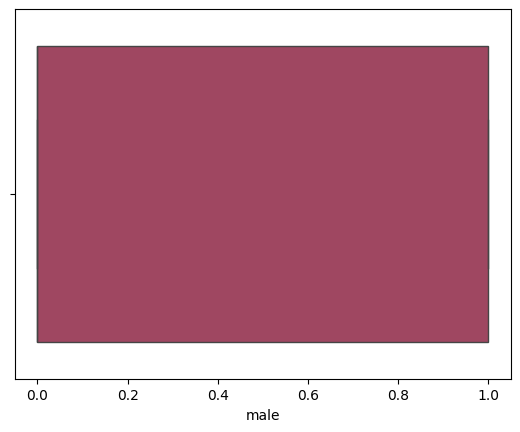

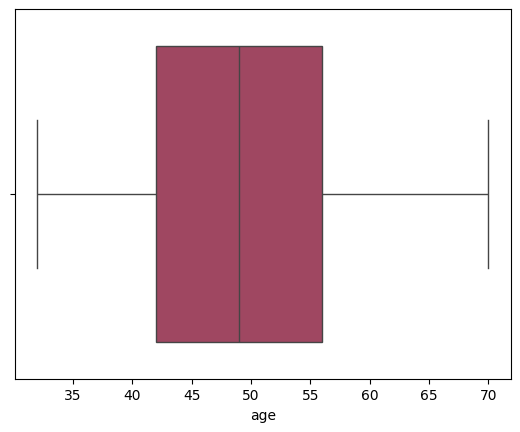

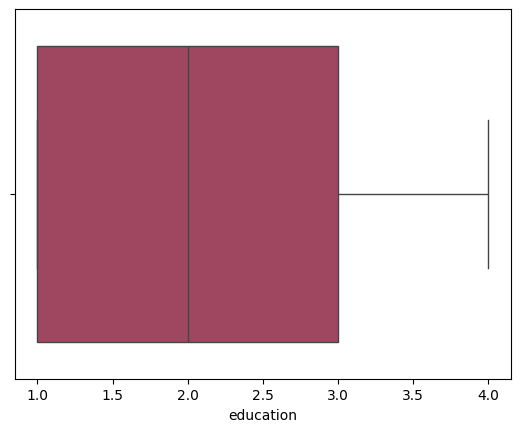

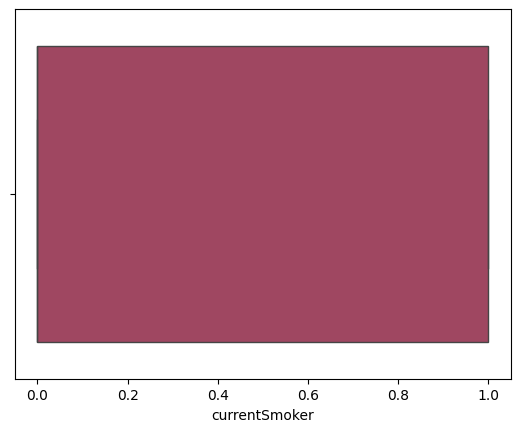

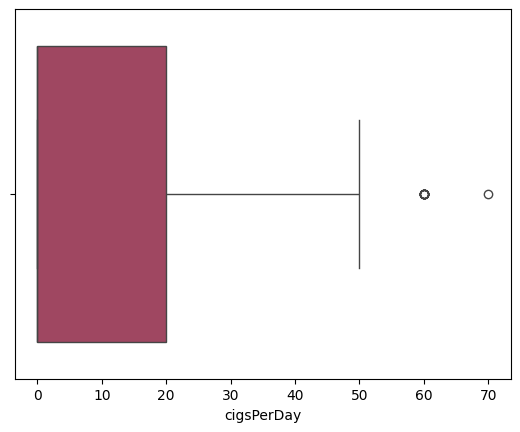

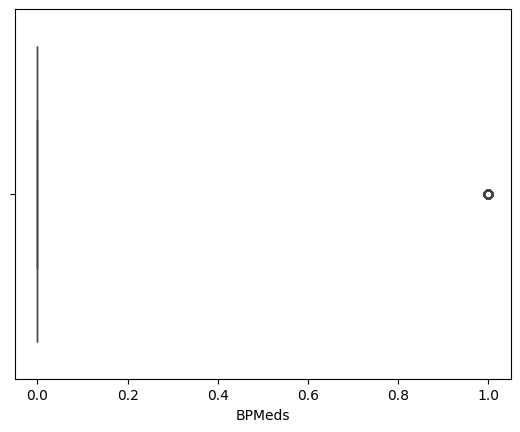

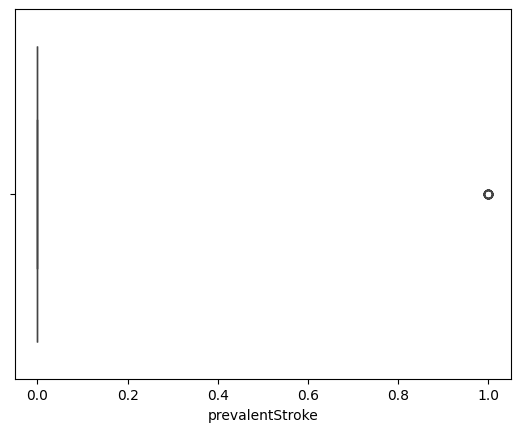

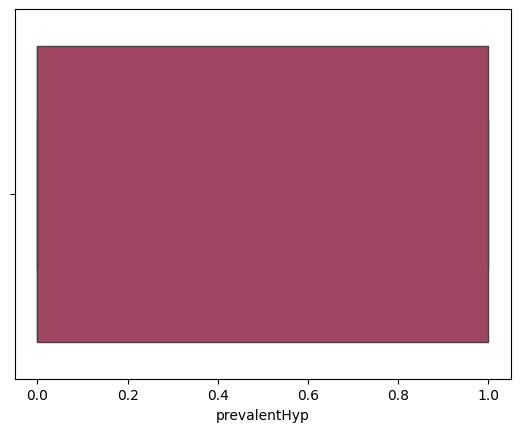

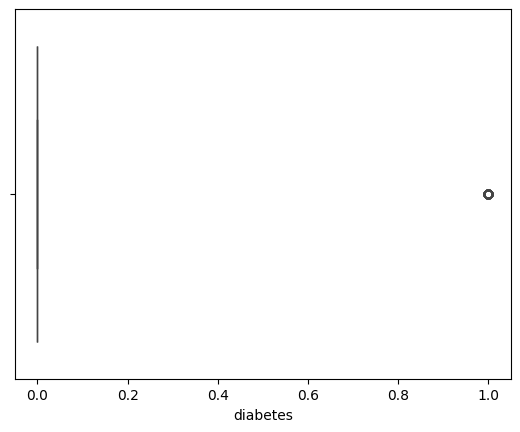

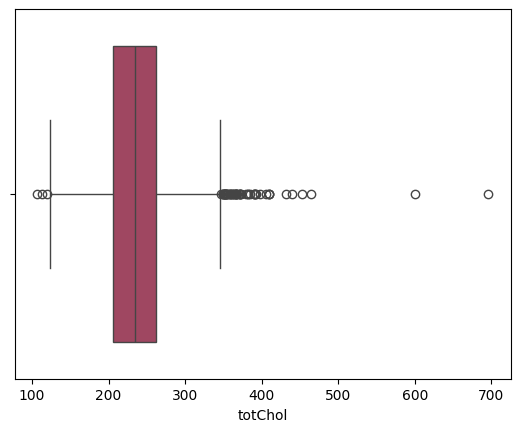

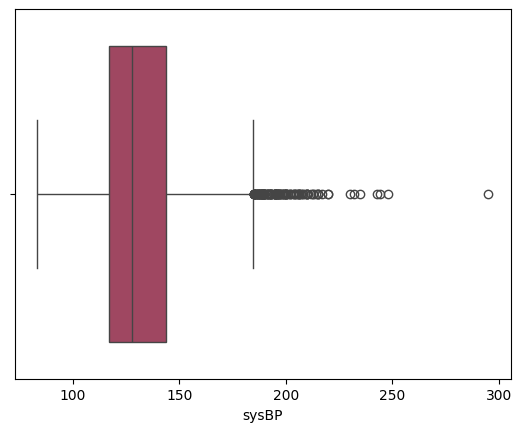

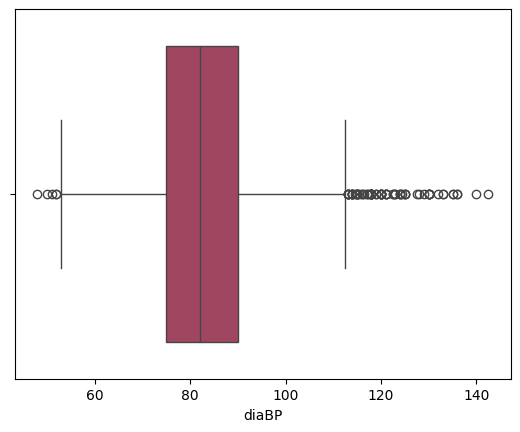

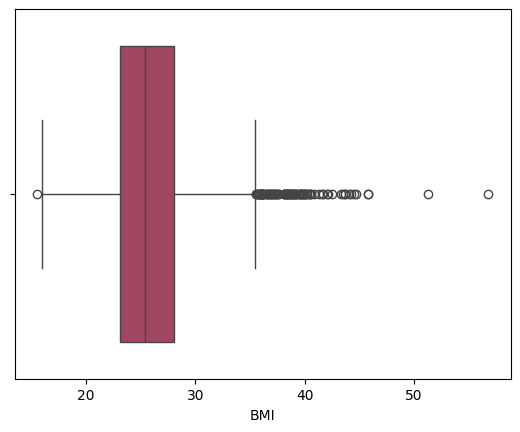

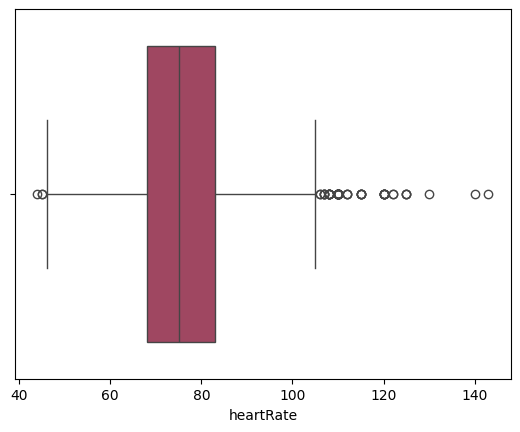

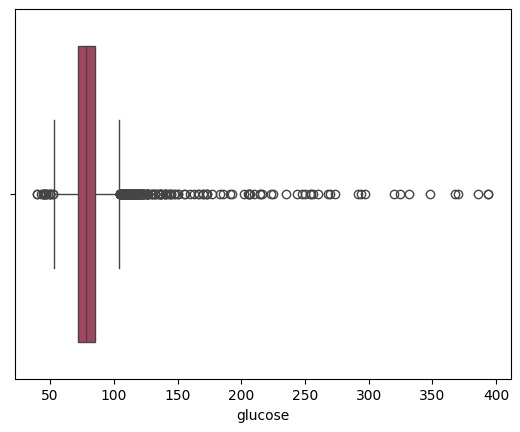

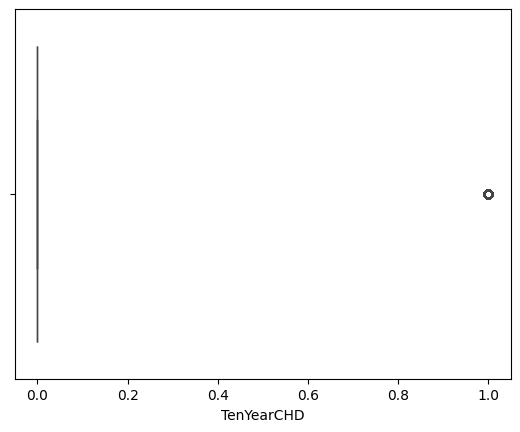

In [ ]:
for i in col:
    plt.figure()
    sns.boxplot(x=df[i],palette="rocket",saturation=0.5)

## process on outliers

In [ ]:
col=df[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

In [ ]:
for i in col:
    q1=np.percentile(df[i],25)
    q3=np.percentile(df[i],75)
    iqr=q3-q1
    lower_fense=q1-1.5*(iqr)
    higher_fense=q3+1.5*(iqr)
    df[i]=np.where(df[i]<lower_fense,lower_fense,df[i])
    df[i]=np.where(df[i]>higher_fense,higher_fense,df[i])

In [ ]:
column=df.columns
column

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<ipython-input-95-c5679f938a4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[p],palette="rocket",saturation=0.5)
<ipython-input-95-c5679f938a4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[p],palette="rocket",saturation=0.5)
<ipython-input-95-c5679f938a4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[p],palette="rocket",saturation=0.5)
<ipython-input-95-c5679f938a4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set 

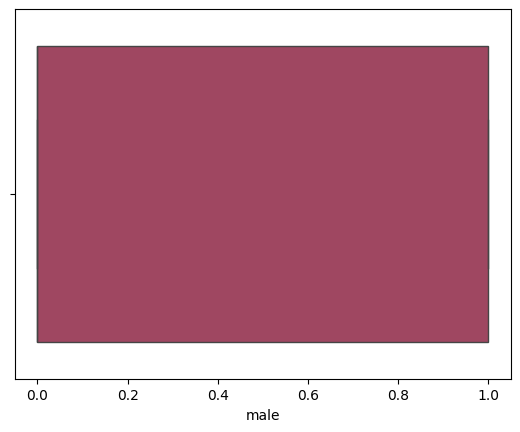

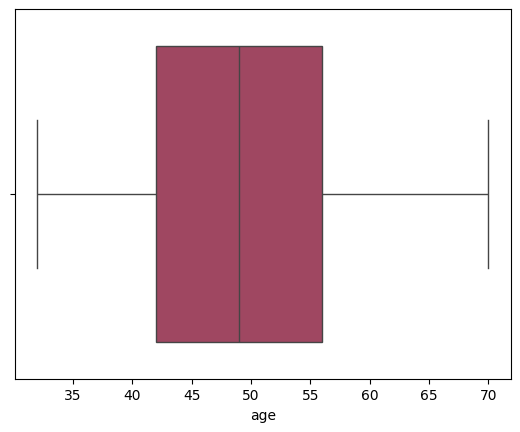

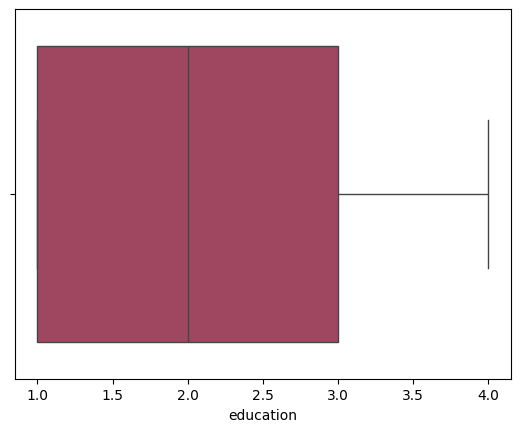

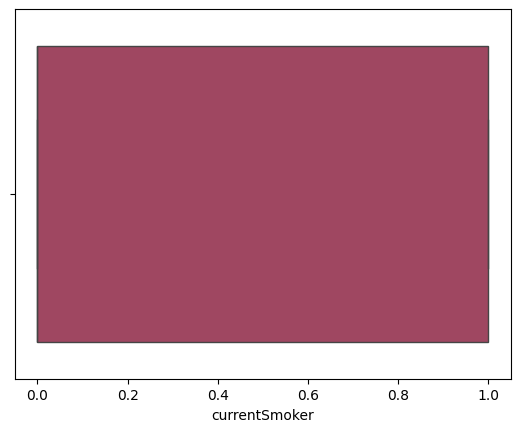

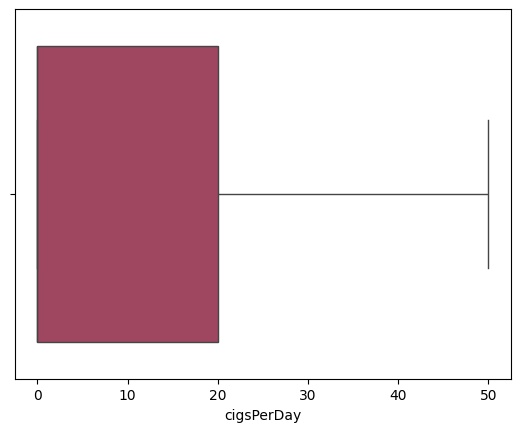

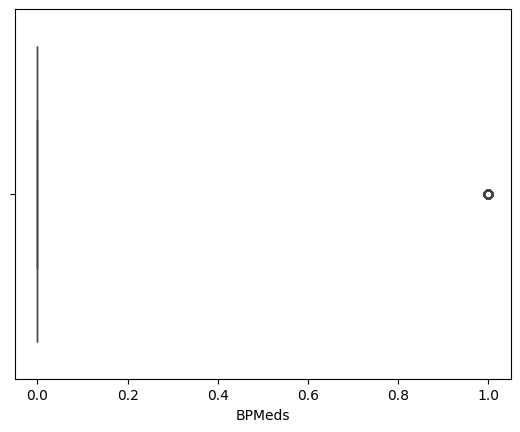

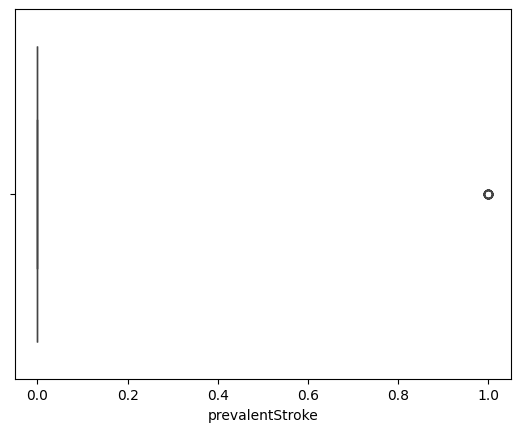

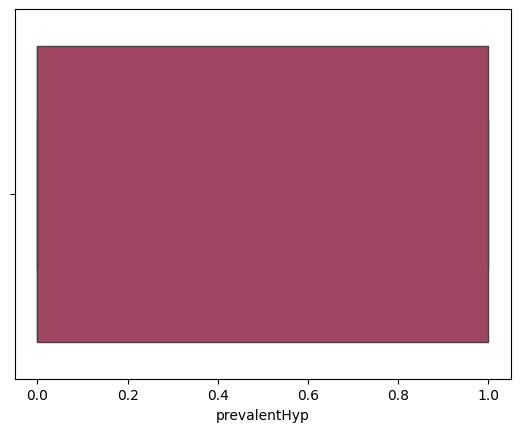

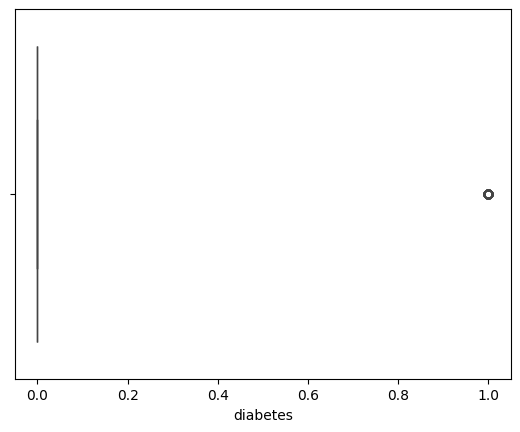

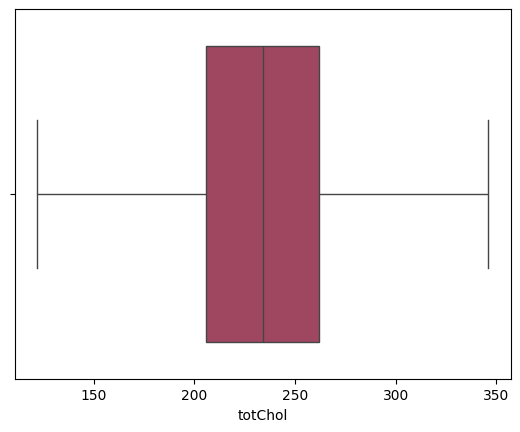

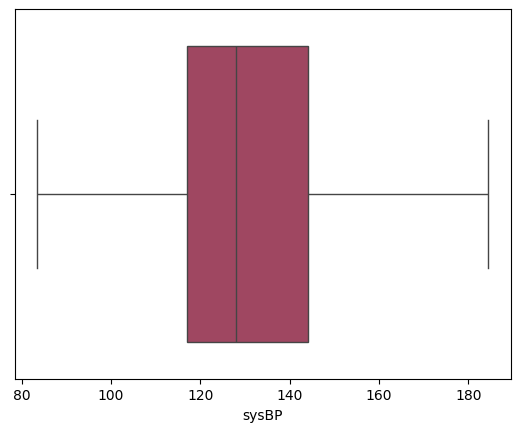

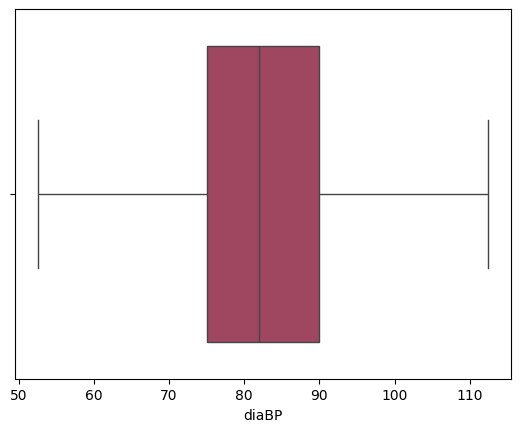

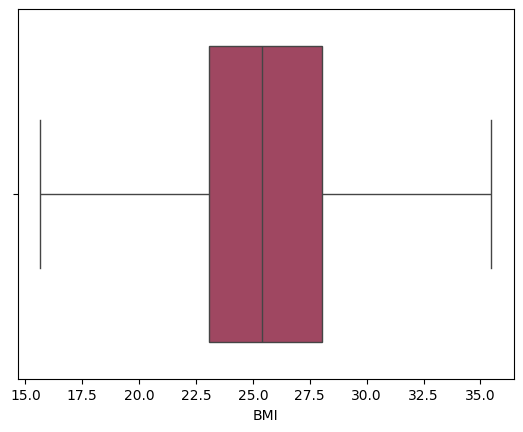

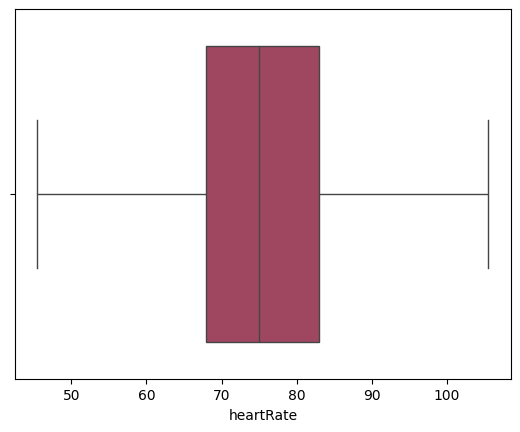

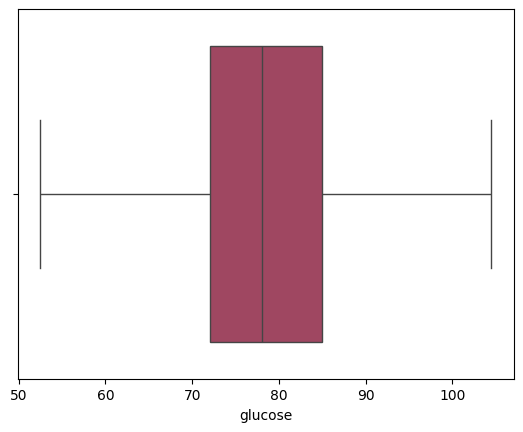

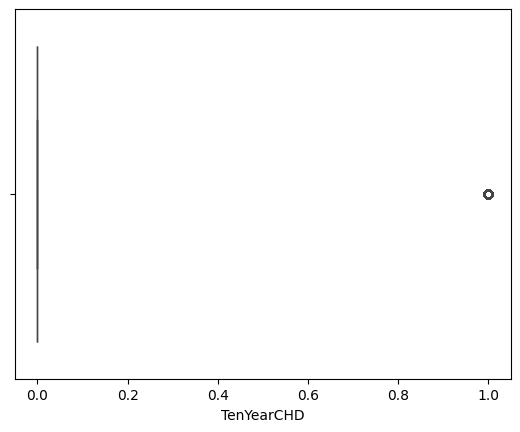

In [ ]:
for p in column:
    plt.figure()
    sns.boxplot(x=df[p],palette="rocket",saturation=0.5)

## Now no outliers in dataset.

# correlation in dataset

In [ ]:
correlation= df.drop(['BPMeds','prevalentStroke','diabetes','TenYearCHD'],axis=1)
corr=correlation.corr
corr()

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.029014,0.017265,0.197026,0.315089,0.005853,-0.071298,-0.029977,0.063458,0.102558,-0.116809,-0.001284
age,-0.029014,1.000000,-0.164016,-0.213662,-0.193818,0.306799,0.269659,0.397649,0.206116,0.137326,-0.014309,0.120181
education,0.017265,-0.164016,1.000000,0.018270,0.008283,-0.080780,-0.022542,-0.128921,-0.060320,-0.132305,-0.052477,-0.026490
currentSmoker,0.197026,-0.213662,0.018270,1.000000,0.765519,-0.103710,-0.049335,-0.130143,-0.107832,-0.170581,0.066706,-0.066680
cigsPerDay,0.315089,-0.193818,0.008283,0.765519,1.000000,-0.067064,-0.027300,-0.088036,-0.055724,-0.092437,0.077993,-0.080479
prevalentHyp,0.005853,0.306799,-0.080780,-0.103710,-0.067064,1.000000,0.160082,0.712913,0.622954,0.296601,0.146545,0.084371
totChol,-0.071298,0.269659,-0.022542,-0.049335,-0.027300,0.160082,1.000000,0.212891,0.174185,0.130775,0.088334,0.037404
sysBP,-0.029977,0.397649,-0.128921,-0.130143,-0.088036,0.712913,0.212891,1.000000,0.782657,0.318916,0.181664,0.119272
diaBP,0.063458,0.206116,-0.060320,-0.107832,-0.055724,0.622954,0.174185,0.782657,1.000000,0.369967,0.182477,0.051192
BMI,0.102558,0.137326,-0.132305,-0.170581,-0.092437,0.296601,0.130775,0.318916,0.369967,1.000000,0.060699,0.083984


# good and positive correlation features

## currentsmoker with cigsPerDay
## prevalentHyp with sysBP
## sysbp with diaBP

# EDA - Exploratory data analysis

In [ ]:
# gender distribution
print("Total males are -",round(df['male'].value_counts(normalize=True)[1]*100),0)
print("Total females are-",round(df['male'].value_counts(normalize=True)[0]*100),0)

Total males are - 43 0
Total females are- 57 0


<ipython-input-98-c13e8df3535a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['male'],palette='magma')


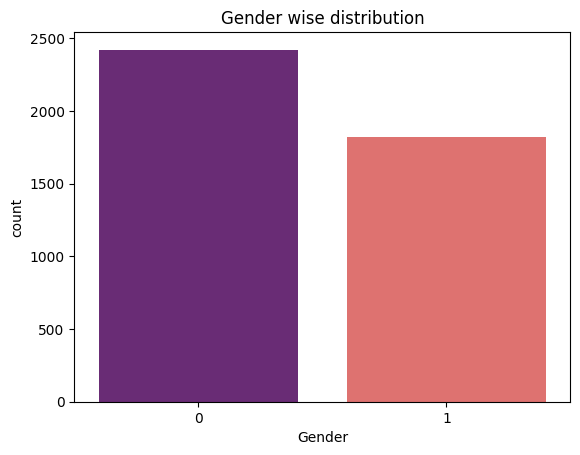

In [ ]:
sns.countplot(x=df['male'],palette='magma')
plt.title("Gender wise distribution")
plt.xlabel("Gender")
plt.show()

In [ ]:
print("Total heart disease cases are - ",df['TenYearCHD'].value_counts()[1])

Total heart disease cases are -  644


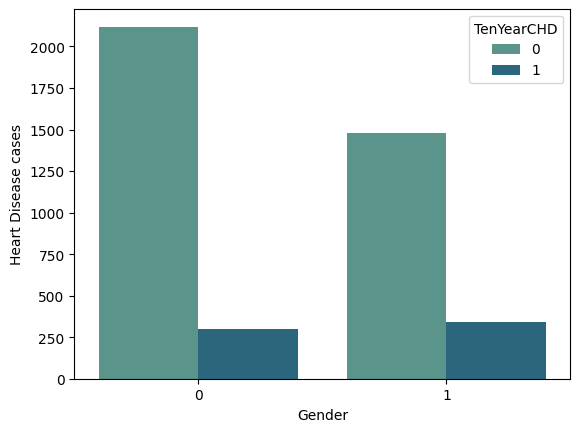

In [ ]:
sns.countplot(x=df['male'],hue=df['TenYearCHD'],palette='crest')
plt.ylabel("Heart Disease cases")
plt.xlabel("Gender")
plt.show()

## 301 No's female having 10 year risk of coronary heart disease CHD.
## 343 no's male having 10 year risk of coronary heart disease CHD

In [ ]:
gen_chd= round(df[['male','TenYearCHD']].value_counts(normalize=True)*100,0)
pd.DataFrame(gen_chd,columns=['percentage'])

,percentage


## 8% male and 7% female having 10 year risk of coronary heart disease CHD
## coronary heart disease in male is more than female.

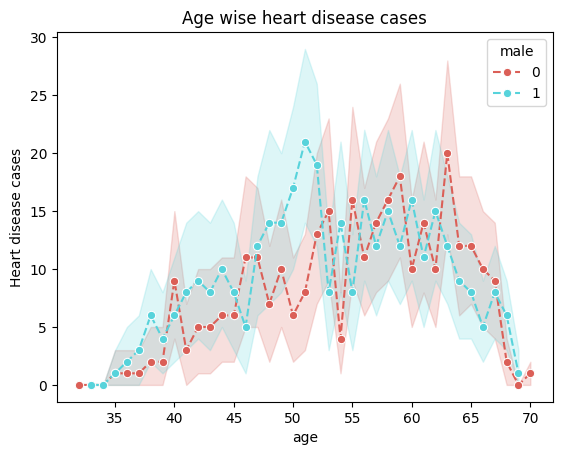

In [ ]:
sns.lineplot(data=df,x='age',y='TenYearCHD',estimator=sum,hue='male',linestyle='dashed',marker='o',palette='hls')
plt.title("Age wise heart disease cases")
plt.ylabel("Heart disease cases")
plt.show()

## Male - Max heart disease cases in between 50 to 52 years old.
## Female - Max heart disease cases in between 63 to 64 years old.

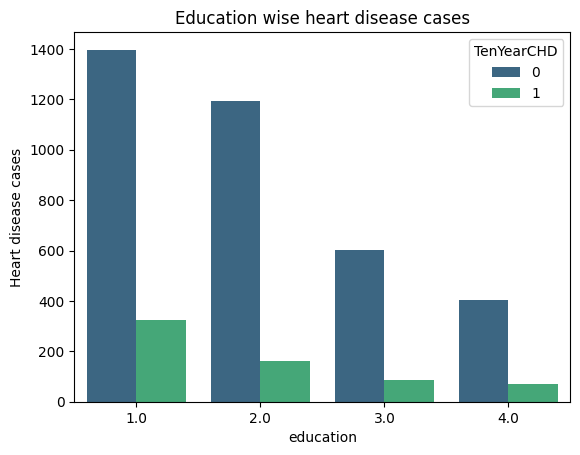

In [ ]:
sns.countplot(data=df,x='education',hue='TenYearCHD',palette='viridis')
plt.title("Education wise heart disease cases")
plt.ylabel("Heart disease cases")
plt.show()

In [ ]:
round(df[['male','education']].value_counts(normalize=True)*100,0)

male  education
0     1.0          22.0
      2.0          19.0
1     1.0          18.0
      2.0          13.0
0     3.0          11.0
1     4.0           7.0
      3.0           5.0
0     4.0           5.0
Name: proportion, dtype: float64

## Education 1.0 having maximum heart disease cases.
## 18% male are in education 1.0

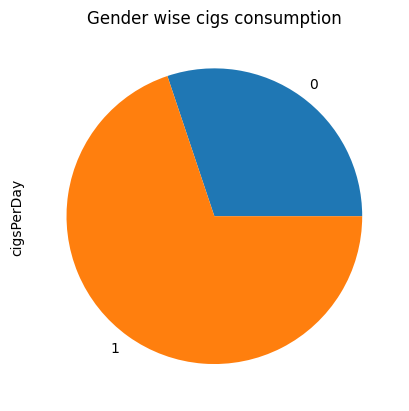

In [ ]:
df.groupby('male')['cigsPerDay'].mean().plot(kind='pie')
plt.title("Gender wise cigs consumption")
plt.show()

## Male consumed more cigarret than female.
## average cigarret consumed by male per day is 13 no's.

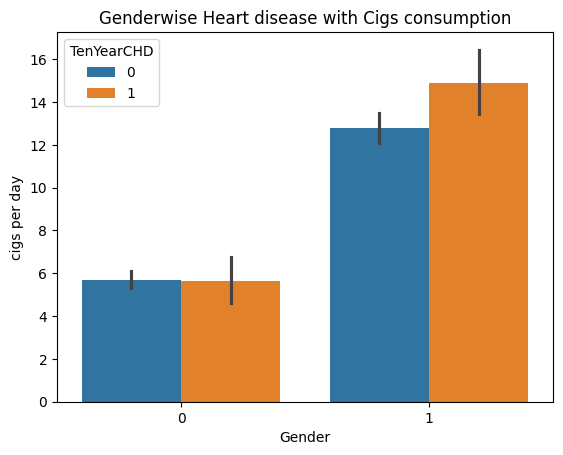

In [ ]:
sns.barplot(data=df,y='cigsPerDay',x='male',hue='TenYearCHD')
plt.title("Genderwise Heart disease with Cigs consumption")
plt.ylabel("cigs per day")
plt.xlabel("Gender")
plt.show()

## male heart disease cases consumed more than 14 cigs per day.
## female heart disease cases consumed 6 cigs per day.
## even with less cigs consumption by female, only 1% difference in heart diseases count.
## means cigs affecting more on female than male.

In [ ]:
df.groupby('currentSmoker')['TenYearCHD'].sum()

,TenYearCHD
currentSmoker,
0,311
1,333


## no major diff in number of cases of current smoker and non current smoker.

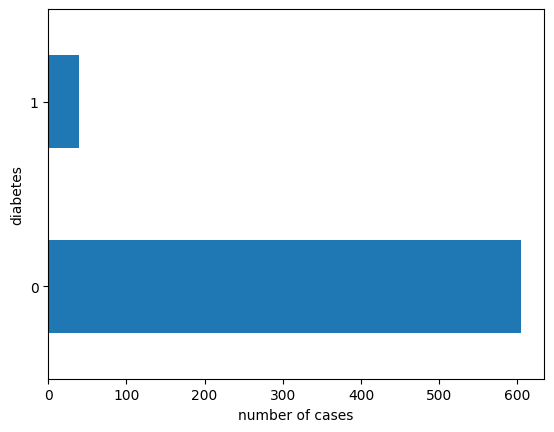

In [ ]:
df.groupby('diabetes')['TenYearCHD'].sum().plot(kind='barh')
plt.xlabel("number of cases")
plt.show()

## number of heart disease cases are more in non diabetes patient, so no any correlation between them.

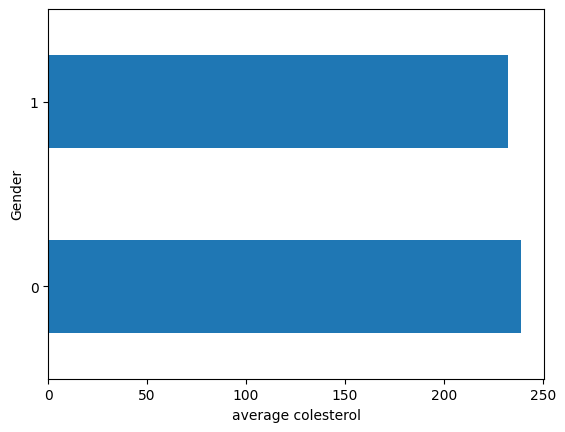

In [ ]:
df.groupby('male')['totChol'].mean().plot(kind='barh')
plt.ylabel("Gender")
plt.xlabel("average colesterol")
plt.show()

## no diff in avg colestrol of male and female.

In [ ]:
print("average cholesterol of heart cases is - ",round(df.groupby('TenYearCHD')['totChol'].mean()[1],0))

average cholesterol of heart cases is -  244.0


In [ ]:
print("average body mass index of heart cases is - ",round(df.groupby('TenYearCHD')['BMI'].mean()[1],0))

average body mass index of heart cases is -  26.0


In [ ]:
print("average glucose of heart cases is - ",round(df.groupby('TenYearCHD')['glucose'].mean()[1],0))

average glucose of heart cases is -  81.0


In [ ]:
print("average heartRate of heart cases is - ",round(df.groupby('TenYearCHD')['heartRate'].mean()[1],0))

average heartRate of heart cases is -  76.0


In [ ]:
print("average sysBP of heart cases is - ",round(df.groupby('TenYearCHD')['sysBP'].mean()[1],0))

average sysBP of heart cases is -  142.0


In [ ]:
print("average diaBP of heart cases is - ",round(df.groupby('TenYearCHD')['diaBP'].mean()[1],0))

average diaBP of heart cases is -  87.0


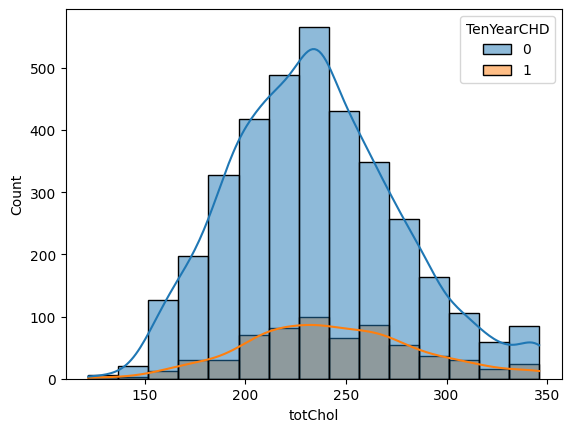

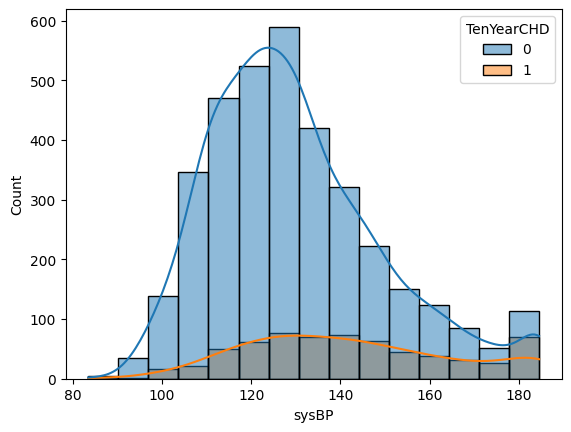

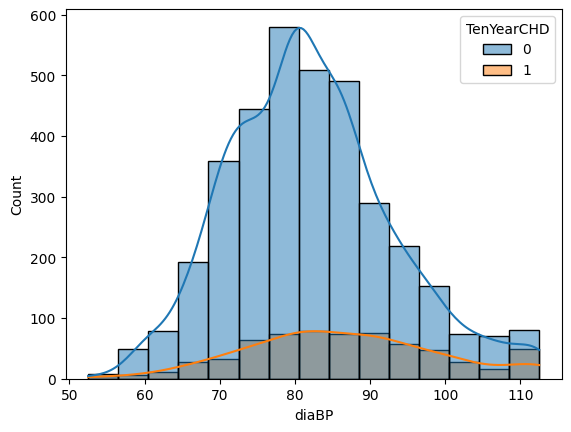

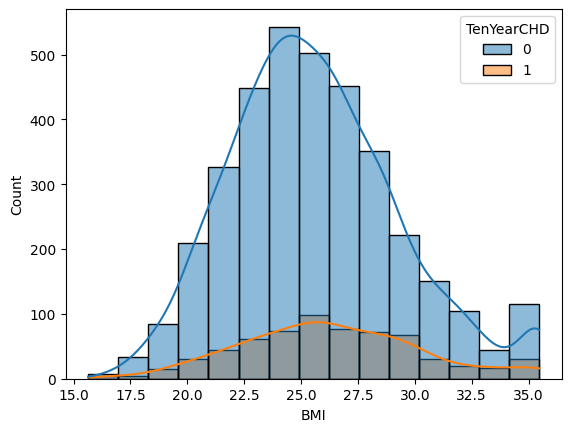

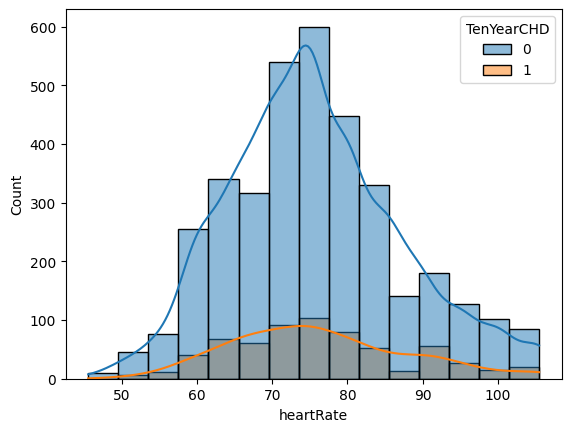

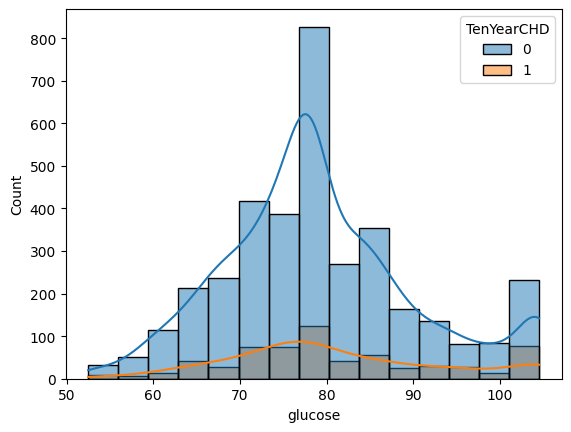

In [ ]:
dist=df[['totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
for i in dist:
    plt.figure()
    sns.histplot(x=dist[i],hue=df['TenYearCHD'],kde=True,bins=15)

## max heart disease cases fall under cholestrol range of 220 to 260.
## Max heart disease cases fall under MBI range 23.5 to 27.5.
## Max heart disease cases fall under sysBP range 125 to 145.
## Max heart disease cases fall under diaBP range 80 to 90.
## max heart disease cases fall under heart rate range 73 to 76.
## max heart disease cases fall under glucose range 78 to 81.

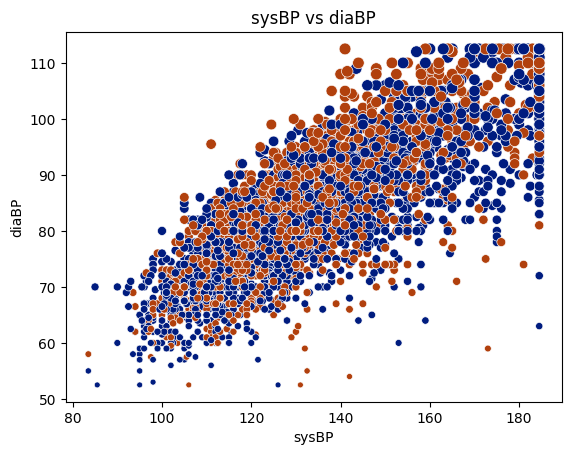

In [ ]:
sns.scatterplot(data=df,x='sysBP',y='diaBP',size='diaBP',legend=None,hue='male',palette='dark')
plt.title("sysBP vs diaBP")
plt.show()

## sysBP and diaBP having positive relationship.

## highest heart disease cases having no prevalent stroke.
## No any relation between them.

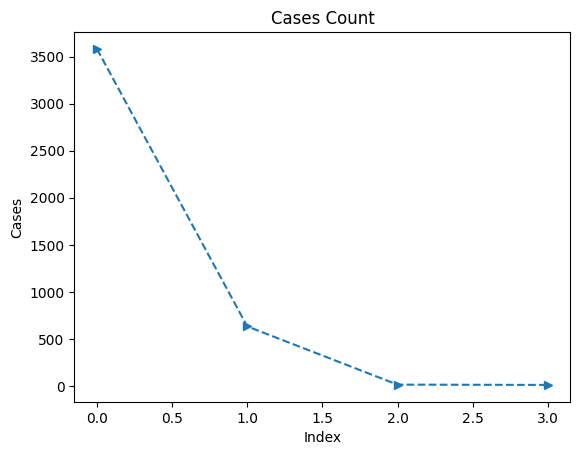

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences and reset index to make it a DataFrame
value_counts_df = df[['prevalentStroke', 'TenYearCHD']].value_counts().reset_index()
value_counts_df.columns = ['prevalentStroke', 'TenYearCHD', 'cases']

# Plot the data
plt.plot(value_counts_df['cases'], linestyle='dashed', marker='>')
plt.title('Cases Count')
plt.xlabel('Index')
plt.ylabel('Cases')
plt.show()


## No any relation of prevalentHyp and heart disease.

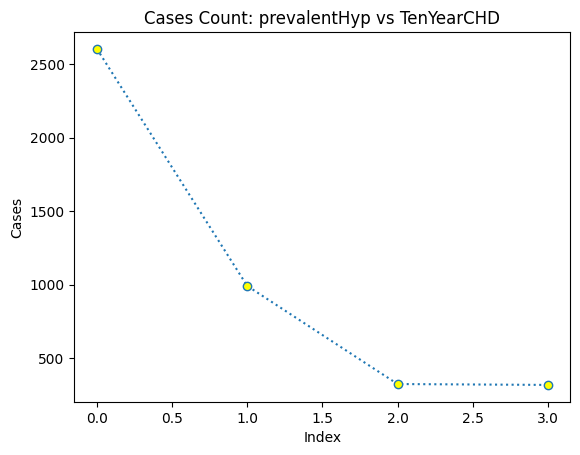

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences and reset index
value_counts_df = df[['prevalentHyp', 'TenYearCHD']].value_counts().reset_index()
value_counts_df.columns = ['prevalentHyp', 'TenYearCHD', 'cases']

# Plotting with matplotlib for linestyle, marker, and marker face color control
plt.plot(value_counts_df.index, value_counts_df['cases'], linestyle='dotted', marker='o', mfc='yellow')
plt.title('Cases Count: prevalentHyp vs TenYearCHD')
plt.xlabel('Index')
plt.ylabel('Cases')
plt.show()


## No any relation in BPMeds and heart disease.

# insights of dataset

## Heart disease study done on 4238 no's of peoples - Males are 43% and females are 57%.
## out of 4238 No's poeples - Heart disease cases are 644 No's- 343 No's Male and 301 No's Female - 8% male and 7% female
## heart disease is more in male then female.
## Max heart disease cases in age - Male 50 to 52 years and female 63 to 64 years.
## Education category 1.0 having max heart disease cases.
## Male consumed more cigs per day than female
## even with less cigs consumption, female having nearly same heart disease cases. so cigs conumption affect more on male than female.
## No any relation of current smoker,prevalent stroke,prevalentHyp,BPMeds and diabeties with heart disease.
## max heart disease cases fall under cholestrol range of 220 to 260,MBI range 23.5 to 27.5, sysBP range 125 to 145.
## Max heart disease cases fall under diaBP range 80 to 90, heart rate range 73 to 76, glucose range 78 to 81.

# Building Logistic ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

def fe_lr(df):
    x = df[['male', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'heartRate', 'glucose']]
    y = df['TenYearCHD']
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=2020)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = fe_lr(df)

def lg(x_train, y_train, x_test):
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    pred = log_reg.predict(x_test)
    return pred

pred = lg(x_train, y_train, x_test)

def lg_val(y_test, pred):
    acc = accuracy_score(y_test, pred)
    conf = confusion_matrix(y_test, pred)
    return acc, conf

acc, conf = lg_val(y_test, pred)

print("Accuracy score is:", round(acc * 100, 2), "%")
print("Confusion matrix:\n", conf)


Accuracy score is: 84.32 %
Confusion matrix:
 [[710   2]
 [131   5]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Above model best accuracy score is 86%, so it is applied.